# Supervised machine learning and regression analysis
1. Import libraries
2. Wrangle & clean data
3. Prepare data for regression analysis
4. Regression analysis

# 1. Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display graphs without need to call
%matplotlib inline

In [3]:
# Import data
df = pd.read_csv(r'/Users/OldBobJulia/Desktop/CF/Course/6. Advanced Analytics and Dashboard Design/Berlin Airbnb Analysis/02 Data/Prepared data/listing_derivedcolumns.csv')

In [4]:
df.head()

,Unnamed: 0,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Price category,Rental availability,Host type
0,0,Mitte,52.54433,13.39761,Private room,28.0,60,18,0.21,3,101,Low price,Middle term,Commercial host
1,1,Mitte,52.53305,13.40394,Entire home/apt,74.0,90,141,2.20,6,357,Low price,Long term,Commercial host
2,2,Pankow,52.53471,13.41810,Entire home/apt,90.0,62,147,1.14,1,254,Middle price,Long term,Private host
3,3,Tempelhof - Schöneberg,52.49884,13.34940,Private room,29.0,7,27,0.28,1,285,Low price,Long term,Private host
4,4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0,7,135,1.02,1,0,Low price,Short term,Private host


In [5]:
# Drop Unnamed
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Price category,Rental availability,Host type
0,Mitte,52.54433,13.39761,Private room,28.0,60,18,0.21,3,101,Low price,Middle term,Commercial host
1,Mitte,52.53305,13.40394,Entire home/apt,74.0,90,141,2.20,6,357,Low price,Long term,Commercial host
2,Pankow,52.53471,13.41810,Entire home/apt,90.0,62,147,1.14,1,254,Middle price,Long term,Private host
3,Tempelhof - Schöneberg,52.49884,13.34940,Private room,29.0,7,27,0.28,1,285,Low price,Long term,Private host
4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0,7,135,1.02,1,0,Low price,Short term,Private host


In [7]:
df.shape

(19095, 13)

# 2. Wrangle & clean data 

In [8]:
# Check columns
df.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Price category',
       'Rental availability', 'Host type'],
      dtype='object')

In [9]:
# Check for missings
df.isnull().sum()

neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4155
calculated_host_listings_count       0
availability_365                     0
Price category                       0
Rental availability                  0
Host type                            0
dtype: int64

Reviews_per_month has 4155 missing values which I decide to leave bc them being missing might be valuable information. 

In [10]:
# Check dups
dups = df.duplicated()

In [11]:
dups.shape

(19095,)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

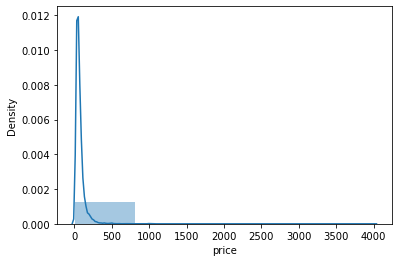

In [16]:
# Check for outliers
sns.distplot(df['price'], bins=5) 

In [17]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19095.000000,19095.000000,19095.00000,19095.000000,19095.000000,14940.000000,19095.000000,19095.000000
mean,52.510215,13.404654,72.08474,9.105944,21.637078,0.718274,3.135847,91.271694
std,0.032391,0.062953,93.21170,33.635956,48.670427,1.445272,7.773246,127.645330
min,52.340070,13.097150,8.00000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,52.489710,13.367160,35.00000,2.000000,1.000000,0.090000,1.000000,0.000000
50%,52.509950,13.414090,52.00000,3.000000,4.000000,0.270000,1.000000,0.000000
75%,52.533320,13.438900,81.00000,5.000000,17.000000,0.830000,2.000000,175.000000
max,52.656110,13.757370,4000.00000,1124.000000,620.000000,94.350000,76.000000,365.000000


# 3. Prepare data for regression analysis

Check which variables have a linear relationship using scatterplots, to see which ones are suitable for regression analysis

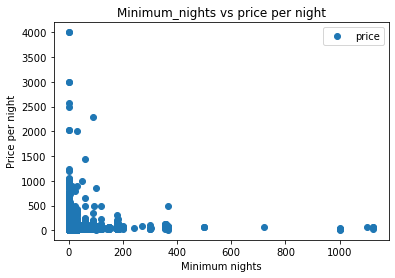

In [19]:
# Create scatterplot minimum_nights vs price

df.plot(x = 'minimum_nights', y='price',style='o')
plt.title('Minimum_nights vs price per night')  
plt.xlabel('Minimum nights')  
plt.ylabel('Price per night')  
plt.show()

There is a tendency but it's not linear. There's a concentration of data points at the low end of minimum nights. The price decreases as the number of minimum nights increase. 

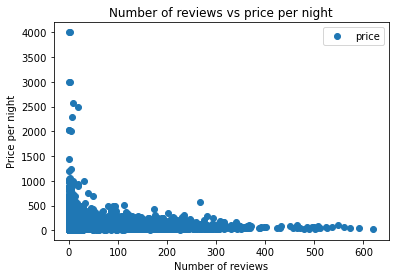

In [20]:
# Create scatterplot number_of_reviews vs price
df.plot(x = 'number_of_reviews', y='price',style='o')
plt.title('Number of reviews vs price per night')  
plt.xlabel('Number of reviews')  
plt.ylabel('Price per night')  
plt.show()

This relationship is not linear, either

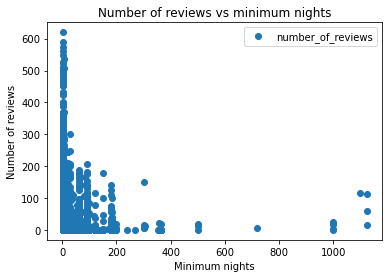

In [21]:
# Create scatter plot Number of reviews vs minimum nights. Do minimum_nights have an impact on number of reviews? 
df.plot(x = 'minimum_nights', y='number_of_reviews',style='o')
plt.title('Number of reviews vs minimum nights')  
plt.xlabel('Minimum nights')  
plt.ylabel('Number of reviews')  
plt.show()

This relationship looks somewhat linear. 

Hypothesis: The lower the minimum nights, the higher the number of reviews. 

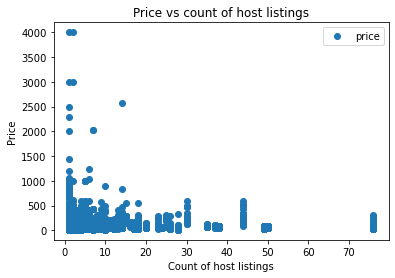

In [23]:
# Create scatter plot price vs calculated_host_listings_count
df.plot(x = 'calculated_host_listings_count', y='price',style='o')
plt.title('Price vs count of host listings')  
plt.xlabel('Count of host listings')  
plt.ylabel('Price')  
plt.show()

This relationship could be linear.

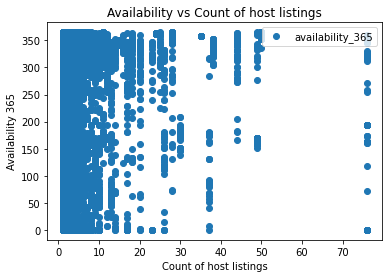

In [24]:
# Create scatter plot availability vs calculated_host_listings_count.
df.plot(x = 'calculated_host_listings_count', y='availability_365',style='o')
plt.title('Availability vs Count of host listings')  
plt.xlabel('Count of host listings')  
plt.ylabel('Availability 365')  
plt.show()

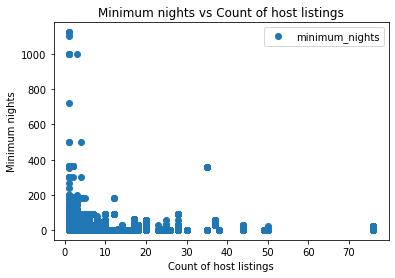

In [28]:
# Create scatter plot calculated_host_listings count vs minimum nights.
df.plot(x = 'calculated_host_listings_count', y='minimum_nights',style='o')
plt.title('Minimum nights vs Count of host listings')  
plt.xlabel('Count of host listings')  
plt.ylabel('Minimum nights')  
plt.show()

This relationship could be linear as well. 

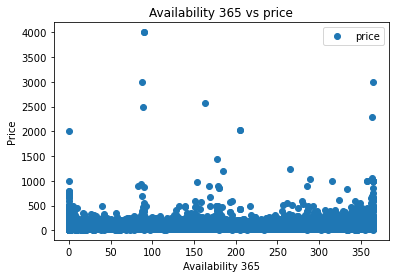

In [29]:
# Create scatter plot Availability 365 vs price. 
df.plot(x = 'availability_365', y='price',style='o')
plt.title('Availability 365 vs price')  
plt.xlabel('Availability 365')  
plt.ylabel('Price')  
plt.show()

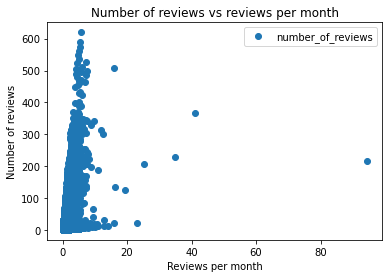

In [30]:
# Create scatter plot Number of reviews vs reviews per month. 
df.plot(x = 'reviews_per_month', y='number_of_reviews',style='o')
plt.title('Number of reviews vs reviews per month')  
plt.xlabel('Reviews per month')  
plt.ylabel('Number of reviews')  
plt.show()

**Of all these scatterplots linear of all these scatter plots is Price vs Count of host listings. I will proceed with regression analysis with those variables**

In [31]:
# Reshape the variables, put them into separate objects.

X = df['calculated_host_listings_count'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [32]:
X

array([[3],
       [6],
       [1],
       ...,
       [2],
       [1],
       [5]])

In [33]:
y

array([[28.],
       [74.],
       [90.],
       ...,
       [35.],
       [49.],
       [74.]])

In [34]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [35]:
# Create regression object
regression = LinearRegression()

In [36]:
# Fit it onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Use trained regression object to predict y using X in test set 
y_predicted = regression.predict(X_test)

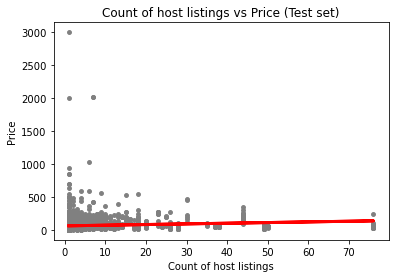

In [38]:
# Create plot showing regression line (results) from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Count of host listings vs Price (Test set)')
plot_test.xlabel('Count of host listings')
plot_test.ylabel('Price')
plot_test.show()

In [39]:
# Create objects that contain model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [40]:
# Check model summary statistics to evaluate performance of model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.99955684]]
Mean squared error:  7208.617923462368
R2 score:  0.011163277592657117


The slope coefficent is positive indicating that as X (Count of host listings) increases, y (Price) also increases. 

The MSE is quite big, pointing out that the line is not very accurate.

The R2 score is also pretty low, indicating a relatively poor fit of the model to the data. The linear relationship between the variables is not strong, so a non-linear model to test this relationship would be a better fit.  

In [41]:
# Create a dataframe to compare the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,72.0,70.345501
1,128.0,72.344615
2,69.0,70.345501
3,68.0,70.345501
4,40.0,70.345501
5,40.0,70.345501
6,105.0,70.345501
7,146.0,70.345501
8,25.0,70.345501
9,40.0,70.345501


This confirms that the model doesn't do great at predicting y. 

In [42]:
# Compare how regression fits training set. How well does model predict y in the training set?
y_predicted_train = regression.predict(X_train)

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.99955684]]
Mean squared error:  9224.509306115107
R2 score:  0.0066854505484884585


When we apply the model back to the training set the results aren't so good, either. 

MSE remains large while R2 score is very low. 

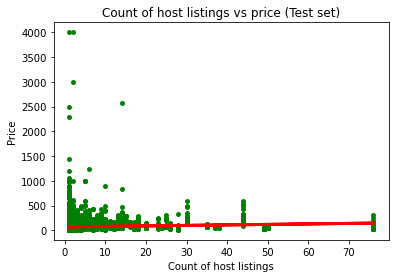

In [45]:
# Visualize it

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Count of host listings vs price (Test set)')
plot_test.xlabel('Count of host listings')
plot_test.ylabel('Price')
plot_test.show()